In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# EDA on Twitter dataset 
Hello and welcome to my Jupyter notebook.

What this does: given a `dataset_name`, saves to the `output_folder`. <u>This will overwrite the previous outputs</u>

Things to improve/play with (`# TODO`):
- **Improve/check the text tokenizer.** I haven't really checked if this works as expected. This affects: *wordclouds* (hashtags and tweet text), *topic extraction*
- **Improve the topic extraction.** I've used Latent Dirichlet Allocation (LDA) to extract topics. I haven't really played with the parameters yet. This affects: *topic extraction*
- **Include non-en tweets.** I've only included English tweets. This affects: *everything*
- **Include retweets.** I don't really know how retweets work in this dataset. This affects: *everything*

### Trying to understand the datasets:

Issues with data: some datasets are too large to be loaded (ira_tweets is 5.3 Gb), most data is not in english.

Description of datasts sorted by size (english tweets only):
- **catalonia_201906_1_tweets_csv_hashed**: Super small dataset on Catalonia's independence. Most tweets not in english.
- **bangladesh_linked_tweets_csv_hashed**: Bangladesh conflict, contains spam
- **iran_201906_3_tweets_csv_hashed**: Saudi Arabia, Trump, some brexit stuff
- **egypt_uae_082019_tweets_csv_hashed**: Qatar, Israel/Palestine conflict
- **iran_201901_1_tweets_csv_hashed_1**: Iran, Israel/Palestine conflict
- **ecuador_082019_tweets_csv_hashed**: mostly spam? maybe football stuff
- **iran_201901_1_tweets_csv_hashed_4**: Israel/Palestine
- **iranian_tweets_csv_hashed**: US/Iran conflict
- **china_082019_1_tweets_csv_hashed**: Mostly spam? Weird keywords
- **china_082019_2_tweets_csv_hashed**: Spam? Lot's of porn keywords
- **iran_201906_1_tweets_csv_hashed**: Intresting dataset! Spam, but also political stuff?
- **iran_201901_1_tweets_csv_hashed_2**: Also interesting. Same as above
- **iran_201901_1_tweets_csv_hashed_3**: Same as above
- **china_082019_3_tweets_csv_hashed_part1**: Spam mostly?
- **china_082019_3_tweets_csv_hashed_part3**: Same as above, lots of asking for retweet
- **iran_201906_2_tweets_csv_hashed**: Israel/Palestine conflict, contains arabic text tagged as english
- **china_082019_3_tweets_csv_hashed_part2**: A lot of tweets about recipes (?), muslim hate?
- **saudi_arabia_112019_tweets_csv_hashed_9**: Seems to be mostly spam
- **saudi_arabia_112019_tweets_csv_hashed_8**: Almost half of the tweets are retweets! also seems spam
- **saudi_arabia_112019_tweets_csv_hashed_3**: Lots of retweets, spam, maybe something about american news?
- **saudi_arabia_112019_tweets_csv_hashed_7**: Something about 1988 massacre, Iran and Yemen
- **saudi_arabia_112019_tweets_csv_hashed_5**: Mixed stuff
- **saudi_arabia_112019_tweets_csv_hashed_6**: "Trump warns iranian terrorists"
- **saudi_arabia_112019_tweets_csv_hashed_4**: Something about Crown Prince ? Lots of spam
- **saudi_arabia_112019_tweets_csv_hashed_2**: Same as above. Something about a prince
- **saudi_arabia_112019_tweets_csv_hashed_1**: A bit of everything... Game of thrones, the prince thing, erdogan...
- **ira_tweets_csv_hashed**: More american politics stuff: trump, obama...

### Set up variables

In [2]:
dataset_name = 'iran_201906_3_tweets_csv_hashed'
output_folder = 'eda_output'
big_dataset = False # only necessary for ira_tweets_csv_hashed
save_figures = False

## Loading the data

In [3]:
os.makedirs(output_folder, exist_ok=True)

In [4]:
if not big_dataset:
    df = pd.read_csv(f'twitter_data/{dataset_name}.csv', low_memory=False)
else:
    df = pd.read_csv(f'twitter_data/{dataset_name}.csv', low_memory=False, chunksize=1000000)
    # remove all non-english tweets
    df = pd.concat([chunk[chunk['tweet_language'] == 'en'] for chunk in tqdm(df)])

df.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,972575171444989953,U34L0qfdryCLc0dl0vzFPfh1jThXOl6D112a+zk98=,U34L0qfdryCLc0dl0vzFPfh1jThXOl6D112a+zk98=,U34L0qfdryCLc0dl0vzFPfh1jThXOl6D112a+zk98=,NaN,برف ، باران و شالگردن همه بهانه است ؛ زمستان آ...,NaN,59,175,2017-11-24,...,absent,absent,0.0,0.0,1.0,0.0,['علی_دایی'],[],[],NaN
1,958132250159276032,nh53J0YZDLdr8g4cRLsmFwI4aGIOIp65UpoITe8F14k=,nh53J0YZDLdr8g4cRLsmFwI4aGIOIp65UpoITe8F14k=,nh53J0YZDLdr8g4cRLsmFwI4aGIOIp65UpoITe8F14k=,Iran,دوستان انقلابی فالو کنند فالو بک داده میشود,NaN,60,93,2017-11-15,...,absent,absent,0.0,0.0,8.0,0.0,"['جانم_فدای_رهبر', 'برف', 'هوای_سرد']",[],[],NaN
2,1048971414638800896,C9gmIrZupcQJk1i8XC61B13vT4q6CHe4fSFybbpmi4=,C9gmIrZupcQJk1i8XC61B13vT4q6CHe4fSFybbpmi4=,C9gmIrZupcQJk1i8XC61B13vT4q6CHe4fSFybbpmi4=,NaN,follow back= no unfollow,NaN,1100,2103,2018-10-03,...,absent,absent,0.0,0.0,0.0,0.0,[],['http://www.iran-newspaper.com/?nid=6893&pid=...,[],NaN
3,1049635168040902658,C9gmIrZupcQJk1i8XC61B13vT4q6CHe4fSFybbpmi4=,C9gmIrZupcQJk1i8XC61B13vT4q6CHe4fSFybbpmi4=,C9gmIrZupcQJk1i8XC61B13vT4q6CHe4fSFybbpmi4=,NaN,follow back= no unfollow,NaN,1100,2103,2018-10-03,...,absent,absent,0.0,1.0,4.0,0.0,[],[],[],NaN
4,1102590560030941185,OWIw97j8KeFNqfOdMLqotE46jt+BCRZsB4S7OMmV3IQ=,OWIw97j8KeFNqfOdMLqotE46jt+BCRZsB4S7OMmV3IQ=,OWIw97j8KeFNqfOdMLqotE46jt+BCRZsB4S7OMmV3IQ=,NaN,1000اشرف میسازیم,NaN,38,145,2019-01-08,...,absent,absent,0.0,2.0,1.0,1.0,"['عیلرضا_نوری_زاده', 'سازمان_مجاهدین_خلق']",[],[],NaN


In [5]:
# convert tweet_time and account_creation_date to datetime
df['tweet_time'] = pd.to_datetime(df['tweet_time'])
df['account_creation_date'] = pd.to_datetime(df['account_creation_date'])

## Language and Retweets

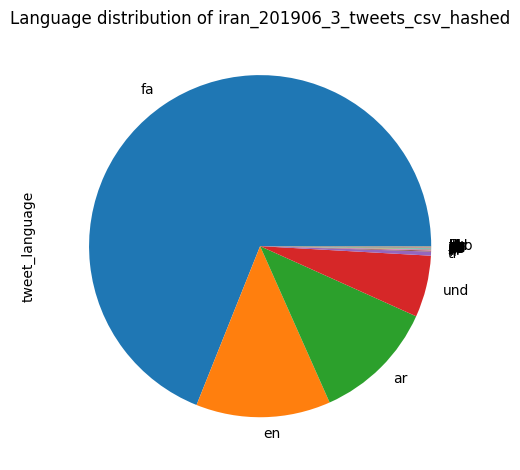

In [6]:
# show pie chart of tweet counts by language
if not big_dataset:
   df['tweet_language'].value_counts().plot.pie()
   plt.title(f'Language distribution of {dataset_name}')
   plt.tight_layout()
   if save_figures:
      plt.savefig(f'{output_folder}/{dataset_name}_language_pie.png')
   plt.show()

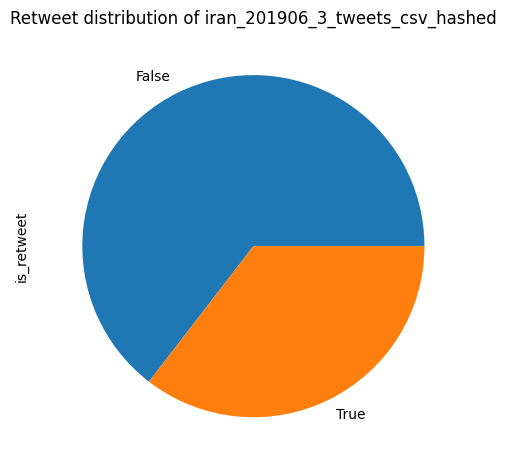

In [7]:
# show pie charts of retweet counts
df['is_retweet'].value_counts().plot.pie()
plt.title(f'Retweet distribution of {dataset_name}')
plt.tight_layout()
plt.show()

In [8]:
# TODO: See Introduction
df = df[df['tweet_language'] == 'en']
# haven't really explored retweets yet, so let's remove them for now
df = df[df['is_retweet'] == False]

## User profiles

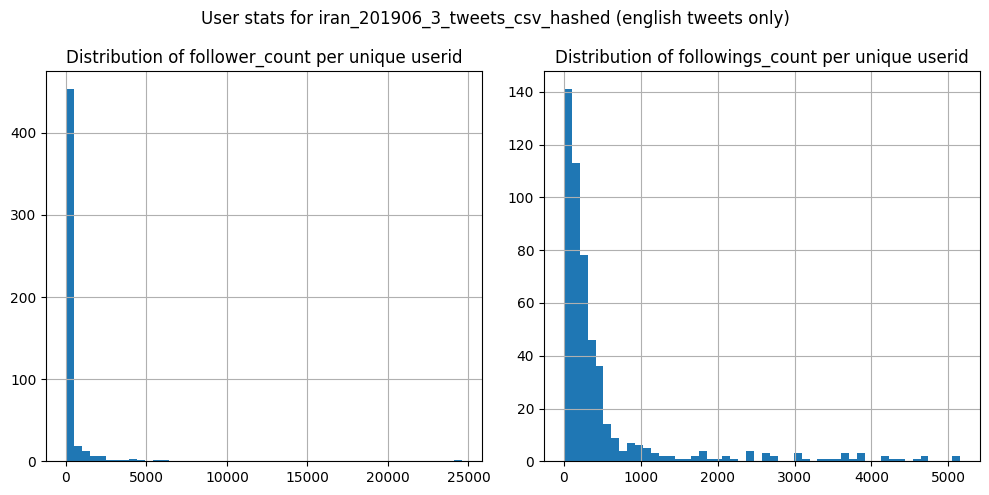

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
df.groupby('userid').follower_count.mean().hist(bins=50, ax=axes[0])
df.groupby('userid').following_count.mean().hist(bins=50, ax=axes[1])
axes[0].set_title('Distribution of follower_count per unique userid')
axes[1].set_title('Distribution of followings_count per unique userid')
fig.suptitle(f'User stats for {dataset_name} (english tweets only)')
plt.tight_layout()
if save_figures:
    plt.savefig(f'{output_folder}/{dataset_name}_user_stats.png')
plt.show()

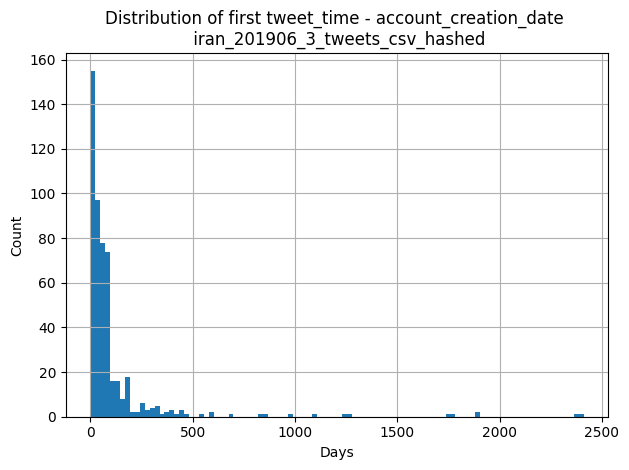

In [10]:
# show distribution of first tweet_time - account_creation_date
# group by userid and take the first tweet_time for each user

groupby_user = df.groupby('userid')
groupby_user.tweet_time.min().sub(groupby_user.account_creation_date.min(), axis=0).dt.days.hist(bins=100)
plt.title(f'Distribution of first tweet_time - account_creation_date \n {dataset_name}')
plt.xlabel('Days')
plt.ylabel('Count')
plt.tight_layout()
if save_figures:
    plt.savefig(f'{output_folder}/{dataset_name}_first_tweet_time_account_creation_date.png')
plt.show()

## Word clouds

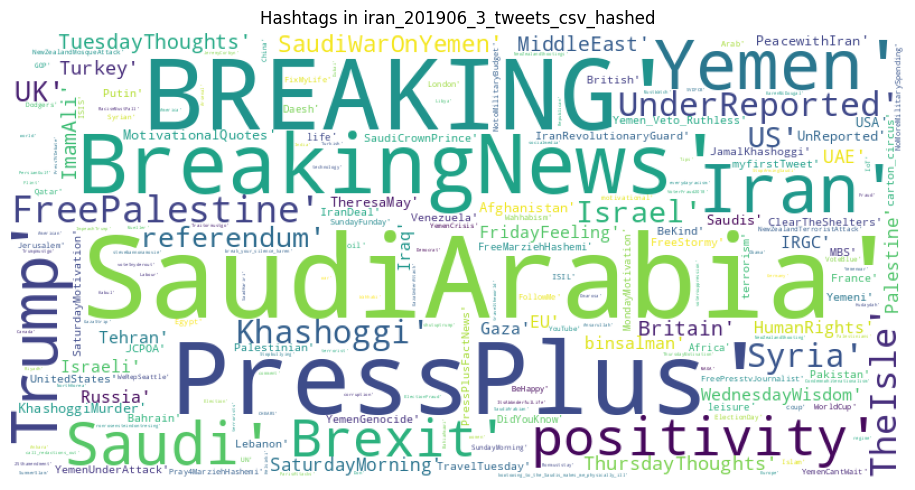

In [11]:
from wordcloud import WordCloud

hashtags = df['hashtags'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(hashtags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Hashtags in {dataset_name}')
plt.tight_layout()
if save_figures:
    plt.savefig(f'{output_folder}/{dataset_name}_hashtags.png')
plt.show()

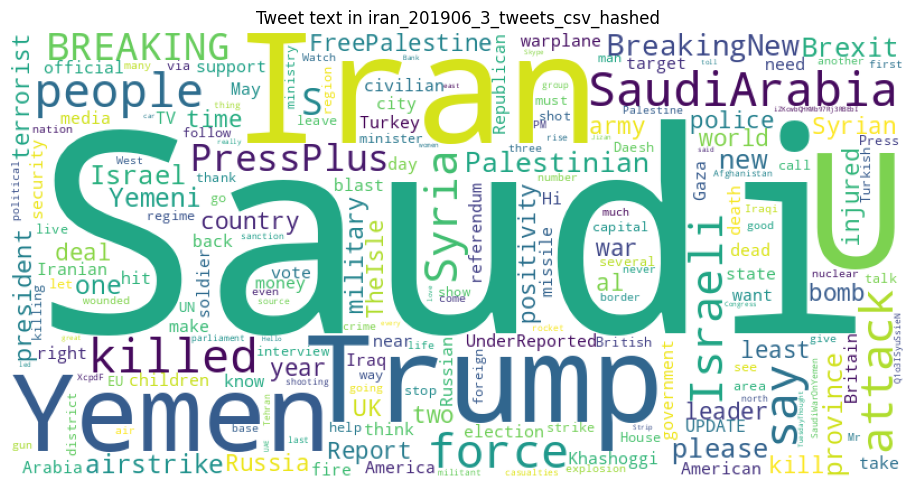

In [12]:
# do the same with tweet text, but remove stopwords
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer # TODO: See Introduction

stop_words = set(stopwords.words('english'))
stop_words.update(['https', 'co', 'amp', 't'])

# remove links and mentions
def remove_links_mentions(text):
    return ' '.join([w for w in text.split() if not w.startswith('http') and not w.startswith('@')])

def remove_stopwords(text):
    word_tokens = TweetTokenizer().tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

df['tweet_text_no_stopwords'] = df['tweet_text'].apply(remove_links_mentions).apply(remove_stopwords)

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(df['tweet_text_no_stopwords'].str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Tweet text in {dataset_name}')
plt.tight_layout()
if save_figures:
    plt.savefig(f'{output_folder}/{dataset_name}_tweet_text.png')
plt.show()

## Random tweet samples
Note: this can crash for really small datasets

In [13]:
# print 10 random tweet_text
for t in df['tweet_text'].sample(10):
    print(t)
    print()

Report: Turkey police officer killed in clashes with Istanbul protesters 
#breakingnews http://t.co/QW1OxcbZj3

5 Reasons You Should Oppose the Saudi Crown Prince’s UK Visit 
https://t.co/2repfwwjVJ
@STWuk @Stop_Alsaud @TheIsle_PressTV

The flag represents the souls of our nation- the men and women who serve-for those we’ve loved and lost whose coffins are draped in our nation’s colors when they return home to us. They fight for those freedoms that many of us take for granted.

RT @haaretzcom: Iran's Ahmadinejad launches website, signaling possible comeback http://t.co/JxzHvlGZFz http://t.co/gVMDlsMO6n

@UNESCO Israel has killed innocent children and no one care. unfortunately Israel and the US instead of care about your reports they pulled out.

China files complaint to WTO against U.S. proposed tariff on Chinese goods 

#BREAKING #economy #UnitedStates https://t.co/xvXhwzsyMj

#Russia's #Putin says inspection of U.S. arms needed

#UnitedStates https://t.co/Fga25ss8Rt

Right Now!

#Po

In [14]:
# manually look at outliers
threshold = 1
outliers = df.groupby('userid').tweet_time.min().sub(df.groupby('userid').account_creation_date.min(), axis=0).dt.days > threshold
# sample tweet_text for outliers
for t in df[df['userid'].isin(outliers[outliers].index)]['tweet_text'].sample(10):
    print(t)
    print()

The city of "Bandar Abbas"
#wednesdaythoughts #Iran @o8DwoZ1IAtQSKgi8UJOvcFY035F5+bIl1lZ15CMWU= #PressPlus #Travel https://t.co/TzmrgGDuun

@StormyDaniels Ass hole do not say nonsense about Trump

20 people followed me and 5 people unfollowed me // automatically checked by http://t.co/Rs2fvPfup0

I'm waiting for 2020 election https://t.co/xDM6GNSpbx

#US 'won't intervene' in #Saudi hit-and-run #murder case https://t.co/jHVoV0seL2

@netanyahu Ready to defeat Israel collapsed
#carton_circus

@janschakowsky Never forget that the Republicons enabled, encouraged and made possible what is about to happen. With their help the Traitor and Putin have brought our country to the brink in just 2 years. Traitors all.
#PeacewithIran
#IranRevolutionaryGuard
#IRGC
https://t.co/8AooELKkls

23 people followed me and 12 people unfollowed me // automatically checked by http://t.co/Rs2fvPfup0

Lil tip for Trump supporters who are setting their shoes on fire to protest Nike hiring Colin Kaepernick: YOU'RE S

In [15]:
# find all tweet_text_no_stopwords that contain 'http'
# df[df['tweet_text_no_stopwords'].str.contains('http')]['tweet_text_no_stopwords'].sample(10)

## Topic Extraction

In [16]:
df.shape[0] * 0.01

209.71

In [18]:
# Topic extraction with LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# ignore words that are in less than 1% of tweets
min_df = int(df.shape[0] * 0.01)
cv = CountVectorizer(max_df=0.95, min_df=min_df, stop_words='english')
dtm = cv.fit_transform(df['tweet_text_no_stopwords'].dropna())

# fit LDA model
# TODO: see Introduction
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# show metrics
if not big_dataset:
    print(f'Log likelihood: {lda.score(dtm)}')
    print(f'Perplexity: {lda.perplexity(dtm)}')


Log likelihood: -252868.84266533406
Perplexity: 106.47266197546637


In [19]:
for idx, topic in enumerate(lda.components_):
    print(f'Top 7 words for topic #{idx}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-7:]])
    print()

Top 7 words for topic #0
['gaza', 'freepalestine', 'yemeni', 'province', 'know', 'positivity', 'pressplus']

Top 7 words for topic #1
['near', 'pm', 'attack', 'kills', 'forces', 'turkey', 'breakingnews']

Top 7 words for topic #2
['attack', 'al', 'saudi', 'breaking', 'airstrike', 'injured', 'killed']

Top 7 words for topic #3
['israel', 'eu', 'iran', 'deal', 'nuclear', 'stop', 'breaking']

Top 7 words for topic #4
['shot', 'al', 'gaza', 'freepalestine', 'forces', 'israeli', 'palestinian']

Top 7 words for topic #5
['iran', 'yemeni', 'kills', 'pm', 'breaking', 'official', 'new']

Top 7 words for topic #6
['attack', 'breaking', 'al', 'iranian', 'state', 'city', 'syrian']

Top 7 words for topic #7
['gaza', 'freepalestine', 'khashoggi', 'yemeni', 'attack', 'iranian', 'iran']

Top 7 words for topic #8
['gaza', 'freepalestine', 'israel', 'foreign', 'ministry', 'report', 'like']

Top 7 words for topic #9
['government', 'foreign', 'yemeni', 'gaza', 'freepalestine', 'israeli', 'israel']

Top 7 

In [20]:
# give each topic a name with the 3 most common words

topic_names = [', '.join([cv.get_feature_names_out()[i] for i in topic.argsort()[-3:]]) for topic in lda.components_]
topic_names

['know, positivity, pressplus',
 'forces, turkey, breakingnews',
 'airstrike, injured, killed',
 'nuclear, stop, breaking',
 'forces, israeli, palestinian',
 'breaking, official, new',
 'state, city, syrian',
 'attack, iranian, iran',
 'ministry, report, like',
 'freepalestine, israeli, israel',
 'right, press, tv',
 'breaking, foreign, minister',
 'breaking, pm, iraq',
 'killed, wounded, children',
 'war, yemen, think',
 'trump, america, world',
 'freepalestine, gaza, israeli',
 'forces, turkish, say',
 'turkey, money, war',
 'killed, bomb, attack',
 'let, near, military',
 'al, arabia, saudi',
 'shot, man, police',
 'yemeni, trump, president',
 'referendum, uk, brexit',
 'breaking, attack, death',
 'airstrike, saudi, yemen',
 'breaking, killing, vote',
 'yemeni, years, time',
 'house, daesh, terrorists',
 'breaking, capital, media',
 'iran, russia, leader',
 'saudi, forces, yemeni',
 'brexit, news, deal',
 'way, day, security',
 'yemeni, government, country',
 'yemen, saudi, province

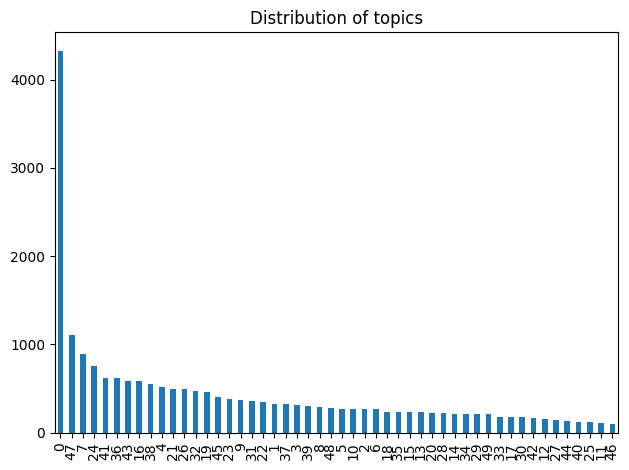

/tmp/ipykernel_6441/1126779943.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


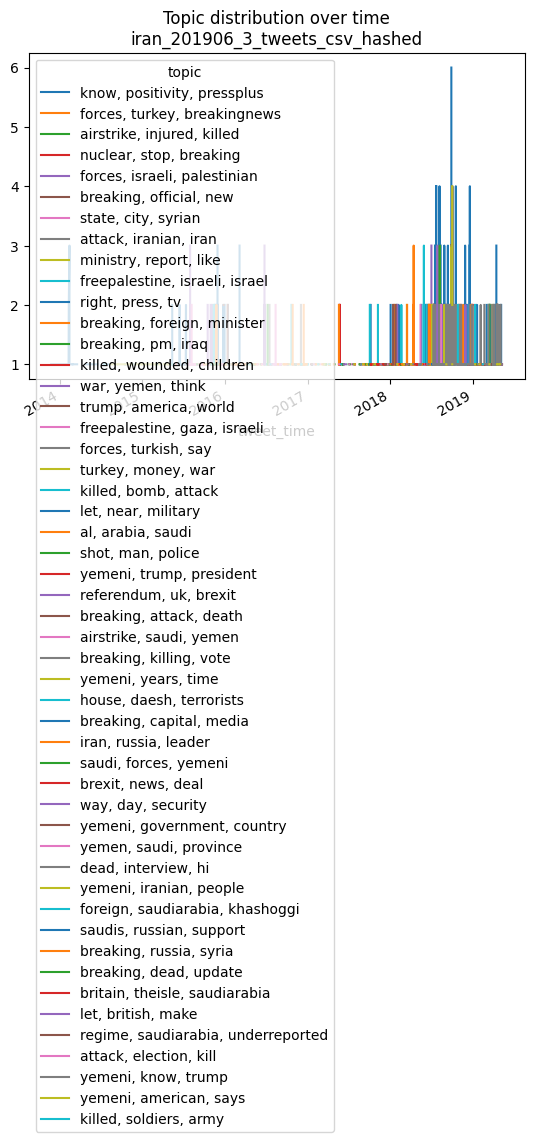

In [26]:
# show distribution of topics for each tweet
topic_results = lda.transform(dtm)
df['topic'] = topic_results.argmax(axis=1)
df['topic'].value_counts().plot.bar()
plt.title('Distribution of topics')
plt.tight_layout()
plt.show()

# show trend of topics over time
df.groupby('tweet_time').topic.value_counts().unstack().rename(columns=dict(zip(range(len(topic_names)), topic_names))).plot()
plt.title(f'Topic distribution over time\n{dataset_name}')
plt.tight_layout()
if save_figures:
    plt.savefig(f'{output_folder}/{dataset_name}_topic_distribution_over_time.png')
plt.show()


## Connecting Users

/tmp/ipykernel_6441/2401336395.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


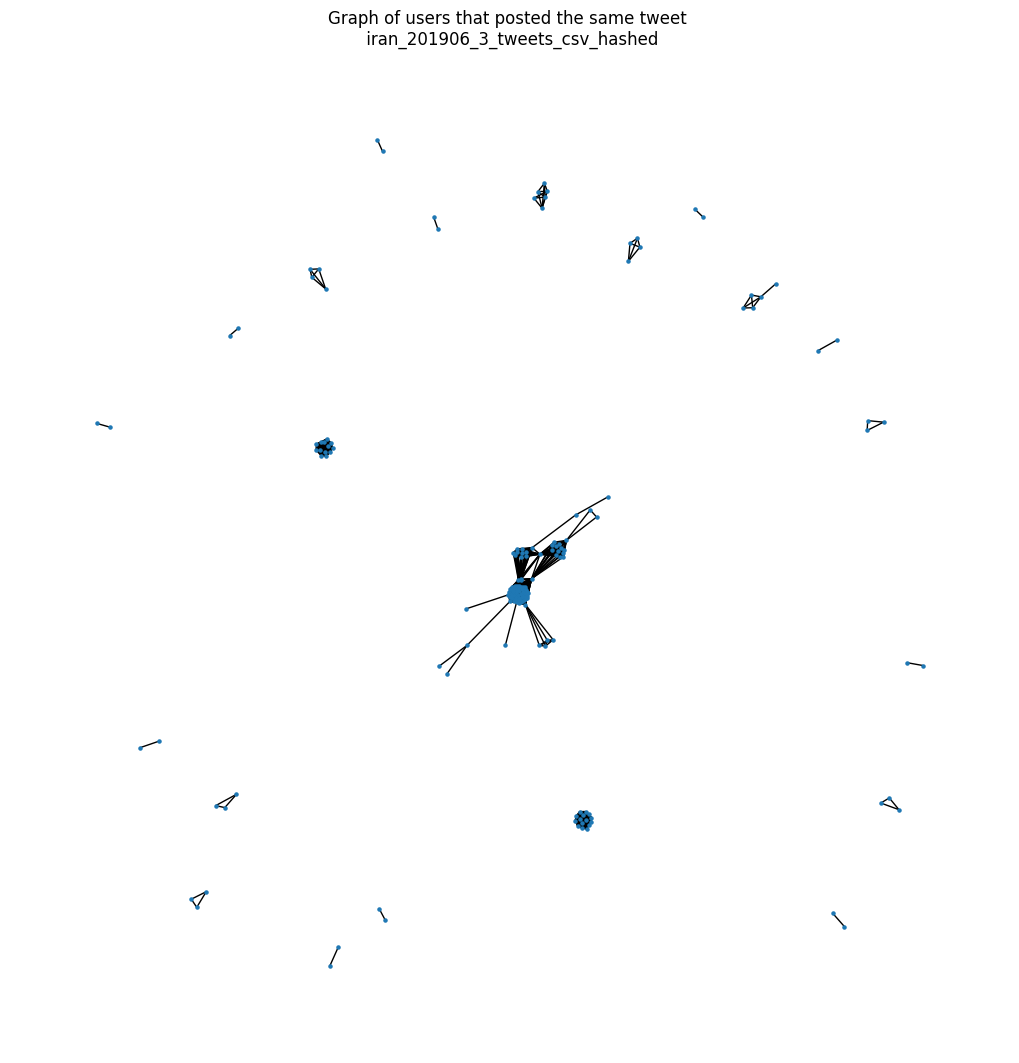

In [22]:
# make graph connecting users that posted the same tweet
import itertools
import networkx as nx

# create graph
G = nx.Graph()

unique_tweets = df.groupby('tweet_text').userid.unique()
unique_tweets = unique_tweets[unique_tweets.apply(len) > 1]
unique_tweets = unique_tweets.apply(lambda x: list(itertools.combinations(x, 2)))
unique_tweets = unique_tweets.explode().tolist()
# add nodes
G.add_nodes_from(df['userid'].unique())

# add edges
G.add_edges_from(unique_tweets)

# remove nodes with degree 0
G.remove_nodes_from([n for n in G if G.degree(n) == 0])

# show graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=False, node_size=5)

plt.title(f'Graph of users that posted the same tweet \n {dataset_name}')
plt.tight_layout()
if save_figures:
    plt.savefig(f'{output_folder}/{dataset_name}_same_tweet_graph.png')
plt.show()

In [23]:
# print tweet_text of node with highest degree
df[df['userid'] == max(G.degree, key=lambda x: x[1])[0]]['tweet_text'].values[0]

'@netanyahu 23 years old till your annihilation\n#carton_circus'

/tmp/ipykernel_6441/1854839606.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


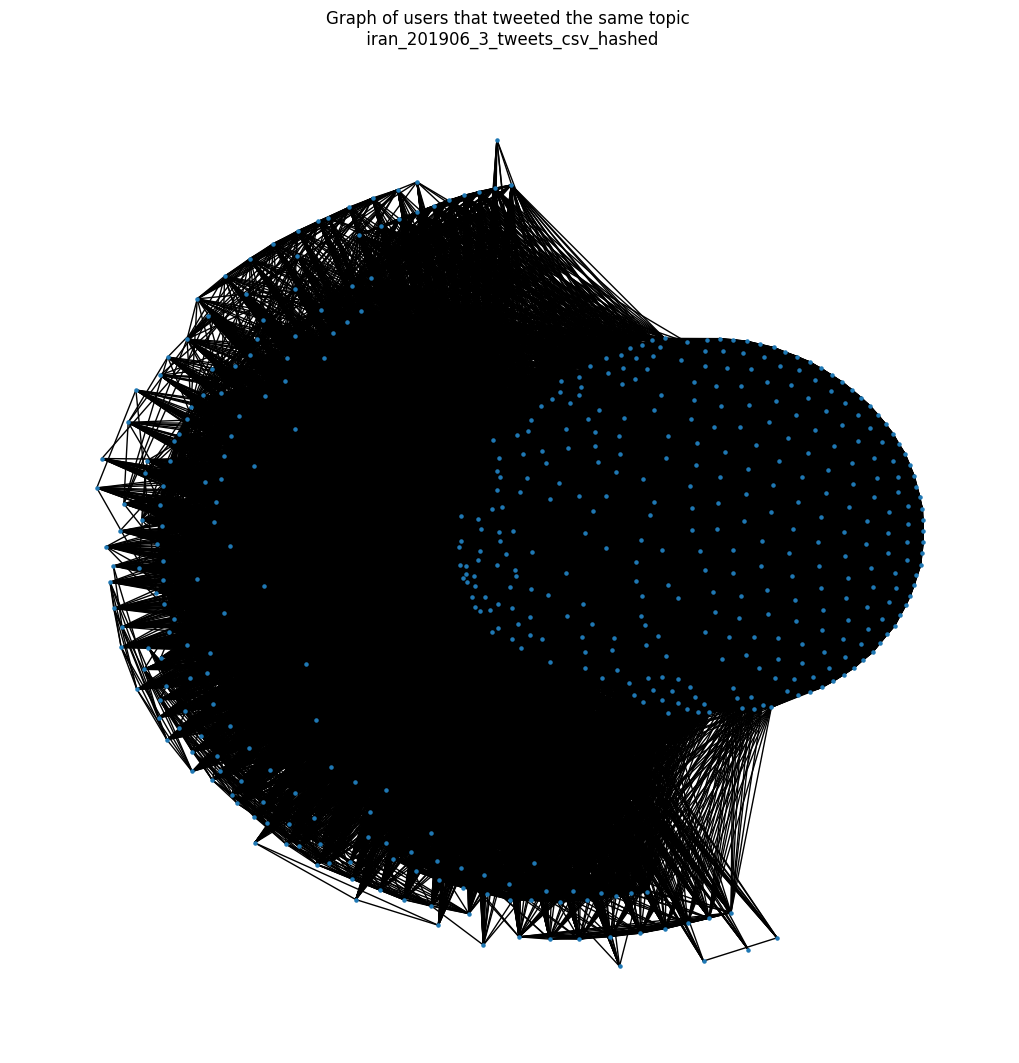

In [24]:
# graph of users that tweeted the same topic
# create graph
G = nx.Graph()

unique_topics = df.groupby('topic').userid.unique()
unique_topics = unique_topics[unique_topics.apply(len) > 1]
unique_topics = unique_topics.apply(lambda x: list(itertools.combinations(x, 2)))
unique_topics = unique_topics.explode().tolist()

# add nodes
G.add_nodes_from(df['userid'].unique())

# add edges
G.add_edges_from(unique_topics)

# remove nodes with degree 0
G.remove_nodes_from([n for n in G if G.degree(n) == 0])

# show graph
plt.figure(figsize=(10, 10))
# nx.draw(G, with_labels=False, node_size=5)
# better layout
nx.draw_kamada_kawai(G, with_labels=False, node_size=5)

plt.title(f'Graph of users that tweeted the same topic \n {dataset_name}')
plt.tight_layout()
if save_figures:
    plt.savefig(f'{output_folder}/{dataset_name}_same_topic_graph.png')
plt.show()

/tmp/ipykernel_6441/2836250562.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


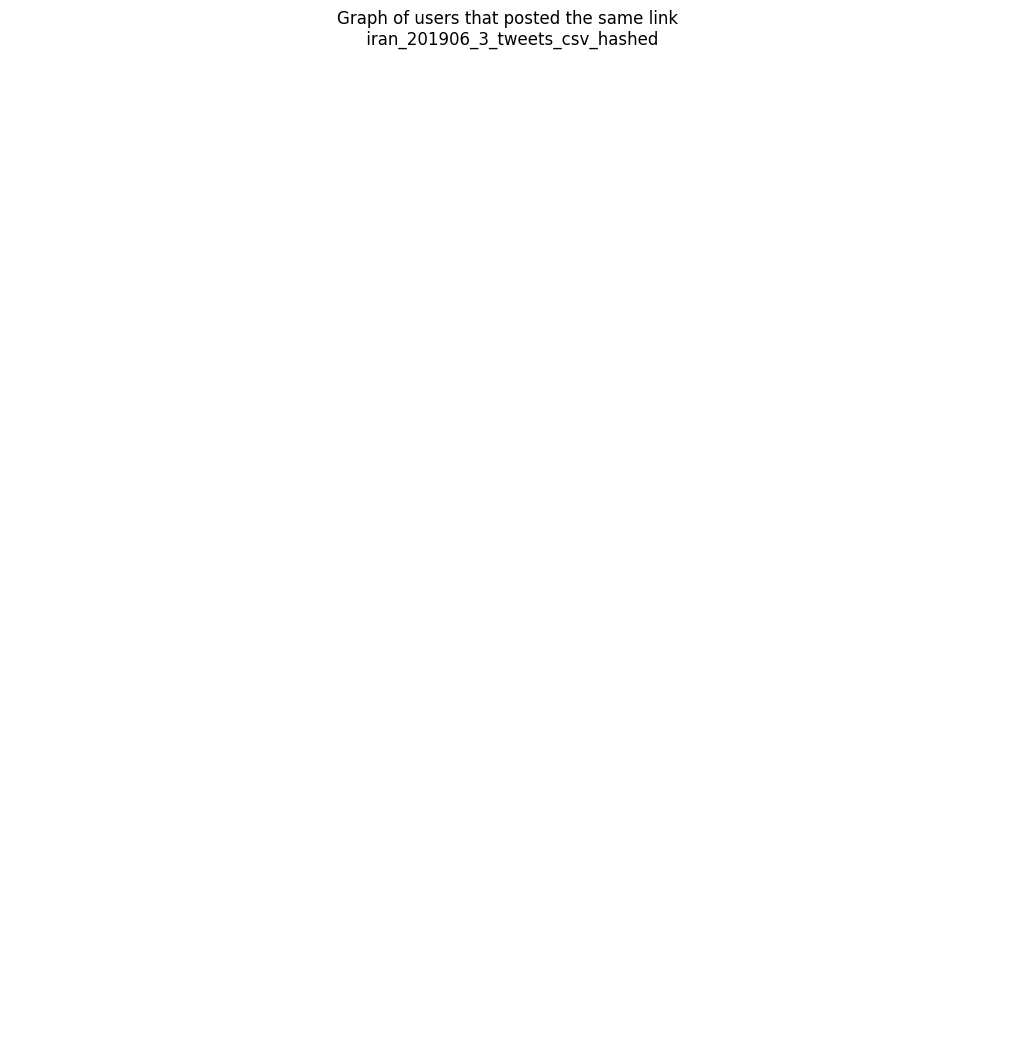

In [25]:
# make graph connecting users that posted the same link
G = nx.Graph()

link_user = {}
for userid, links in df.groupby('userid').tweet_text.apply(lambda x: x.str.extractall(r'(https?://[^\s]+)')[0].unique()).dropna().items():
    for link in links:
        link_user.setdefault(link, []).append(userid)

# find all links that are posted by more than 1 user
link_user = {k: v for k, v in link_user.items() if len(v) > 1}

# add nodes
G.add_nodes_from(df['userid'].unique())

# add edges
G.add_edges_from(list(itertools.chain.from_iterable([list(itertools.combinations(v, 2)) for v in link_user.values()])))
# remove nodes with degree 0
G.remove_nodes_from([n for n in G if G.degree(n) == 0])

# show graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=False, node_size=5)
plt.title(f'Graph of users that posted the same link \n {dataset_name}')
plt.tight_layout()
if save_figures:
    plt.savefig(f'{output_folder}/{dataset_name}_same_link_graph.png')
plt.show()
